## Importing the dependencies

In [1]:
import numpy as np
import os
from keras.models import load_model
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score
from sklearn.metrics import roc_curve, auc
import sys
sys.path.append('../src/utilities')  
from utils1 import plot_confusion_matrix
#from src.utilities.utils1 import plot_confusion_matrix
import plotly.graph_objs as go

## Loading the variables needed for evaluation

In [9]:
y_test = np.load('y_test.npy')

In [10]:
X_test = np.load('X_test.npy')

In [13]:
tag_mbz_filtered = np.load('tag_mbz_filtered.npy', allow_pickle=True)

In [14]:
y_test[:10]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [15]:
X_test[:1]

array([[ 0.30531406, -0.15327074,  0.536637  , -0.26767835, -0.04854104,
        -0.6756543 , -0.28290763, -0.2557176 , -0.5009067 ,  0.52749205,
        -0.18543665, -0.35919645,  0.6689886 , -0.02130235, -0.24916534,
        -0.28053102,  0.03452173,  0.25515816, -0.22083266, -0.33305717,
         0.20947476, -0.4274711 , -0.42835304,  0.30425024, -0.49083528,
         0.99274355, -0.06716897, -0.08364375,  0.50637054, -0.5808653 ,
        -0.14338037, -0.1033645 , -0.50576   ,  0.39153978,  0.08875501,
        -0.13146546, -0.35013255,  0.01304141,  0.50014526, -0.0375253 ,
         0.45142397, -0.13520588, -0.17284258, -0.21394484,  0.35559717,
        -0.07066847, -0.33059123, -0.05916262,  0.68998164,  0.49428567,
         0.39807323,  0.07605159,  0.530038  , -0.22734505,  0.0460413 ,
         0.5484929 ,  0.09818821, -0.34362817, -0.31073198, -0.32740238,
        -0.00511257,  0.24434309, -0.14822866, -0.12622136, -0.609207  ,
         0.06645317,  0.07030117, -0.0072461 ,  0.1

In [16]:
tag_mbz_filtered

array(['british', 'classic pop and rock', 'pop', ..., 'uk', 'uk', 'uk'],
      dtype=object)

## Loading the first model: Bidirectional LSTM with Dropout

In [ ]:
model_path = os.path.join('..', 'models', 'model_rnn.h5')
loaded_model_rnn = load_model(model_path)

In [18]:
x_test_reshaped = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

### Calculating the evaluation metrics for the first model

In [19]:
y_pred_probs = loaded_model_rnn.predict(x_test_reshaped)
y_pred_rnn = (y_pred_probs > 0.5).astype(int)

accuracy_rnn = accuracy_score(y_test, y_pred_rnn)
print("Test Accuracy:", accuracy_rnn)

precision_rnn, recall_rnn, f1_score_rnn, _ = precision_recall_fscore_support(y_test, y_pred_rnn, average='micro')
auc_roc_rnn = roc_auc_score(y_test, y_pred_probs, average='micro')
print(f'Test Precision: {precision_rnn}, Test Recall: {recall_rnn}, Test F1-score: {f1_score_rnn}, Test AUC-ROC: {auc_roc_rnn}')

2024-03-15 00:08:33.373533: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-15 00:08:33.479476: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-15 00:08:33.489736: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-15 00:08:33.543898: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-15 00:08:33.554016: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


 12/275 [>.............................] - ETA: 2s

2024-03-15 00:08:33.611929: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - 3s 9ms/step
Test Accuracy: 0.8011150301513256
Test Precision: 0.8457657657657658, Test Recall: 0.8011150301513256, Test F1-score: 0.8228351057613651, Test AUC-ROC: 0.9752244440885565


### Plotting the confusion matrix for the first model

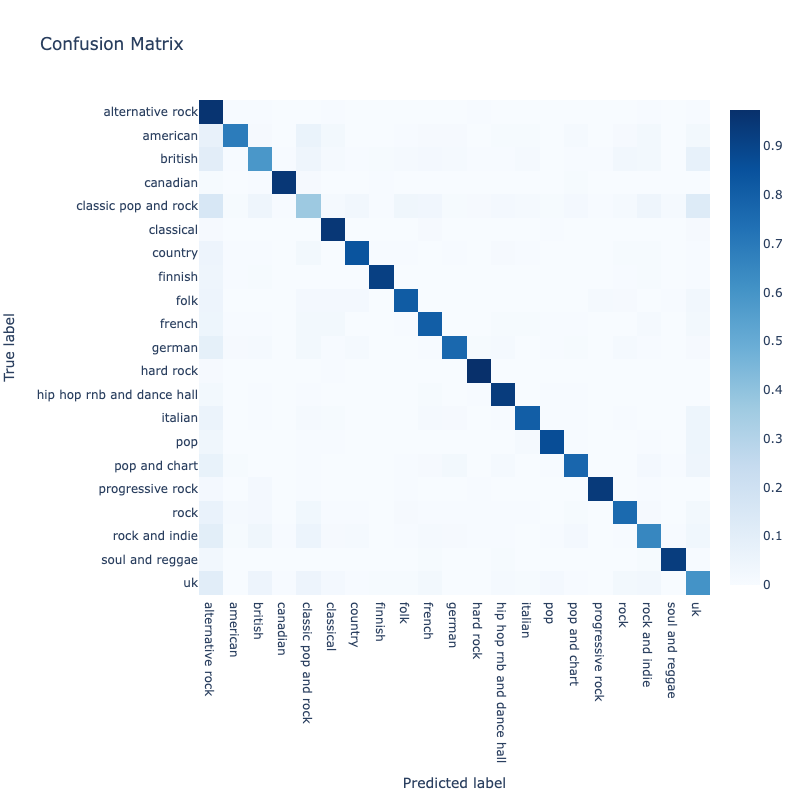

In [20]:
plot_confusion_matrix(y_test.argmax(1), y_pred_rnn.argmax(1), classes=tag_mbz_filtered, normalize=True)

### Plotting the ROC Curve for the first model

In [34]:
y_true = np.argmax(y_test, axis=1)
y_true

array([ 9, 11, 18, ...,  3, 17, 20])

In [37]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(21):
    fpr[i], tpr[i], _ = roc_curve(y_true == i, y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [42]:
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred_probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

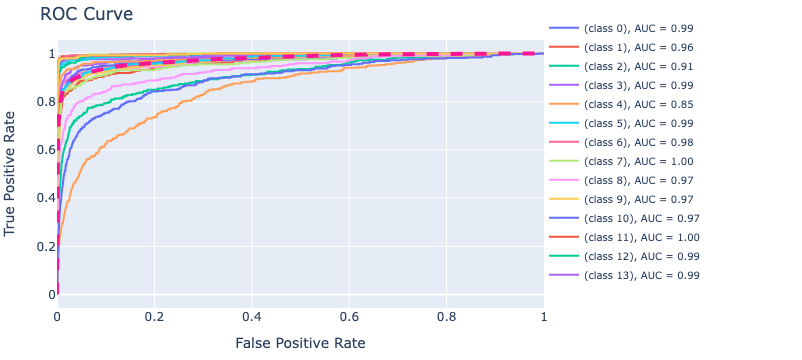

In [60]:
fig = go.Figure()

for i in range(21):
    fig.add_trace(go.Scatter(x=fpr[i], y=tpr[i], 
                             mode='lines',
                             name=f'(class {i}), AUC = {roc_auc[i]:.2f}'))

fig.add_trace(go.Scatter(x=fpr["micro"], y=tpr["micro"], 
                         mode='lines',
                         name=f'micro-average ROC curve (AUC = {roc_auc["micro"]:.2f})',
                         line=dict(color='deeppink', width=4, dash='dash')))

fig.update_layout(title='ROC Curve',
                  xaxis_title='False Positive Rate',
                  yaxis_title='True Positive Rate',
                  legend=dict(x=1, y=0.1, font=dict(size=10)),
                  margin=dict(l=40, r=40, t=40, b=40))

fig.show()

## Loading the second model: Simple LSTM

In [51]:
loaded_model_lstm = load_model('../models/model_simplelstm.h5')

### Calculating the evaluation metrics for the second model

In [54]:
y_pred_probs_lstm = loaded_model_lstm.predict(x_test_reshaped)
y_pred_lstm = (y_pred_probs_lstm > 0.5).astype(int)

accuracy_lstm = accuracy_score(y_test, y_pred_lstm)
print("Test Accuracy:", accuracy_lstm)

precision_lstm, recall_lstm, f1_score_lstm, _ = precision_recall_fscore_support(y_test, y_pred_lstm, average='micro')
auc_roc_lstm = roc_auc_score(y_test, y_pred_probs_lstm, average='micro')
print(f'Test Precision: {precision_lstm}, Test Recall: {recall_lstm}, Test F1-score: {f1_score_lstm}, Test AUC-ROC: {auc_roc_lstm}')

275/275 [==============================] - 1s 5ms/step
Test Accuracy: 0.6241893275685516
Test Precision: 0.845691382765531, Test Recall: 0.6241893275685516, Test F1-score: 0.7182508510081174, Test AUC-ROC: 0.9639559864450076


### Plotting the confusion matix for the second model

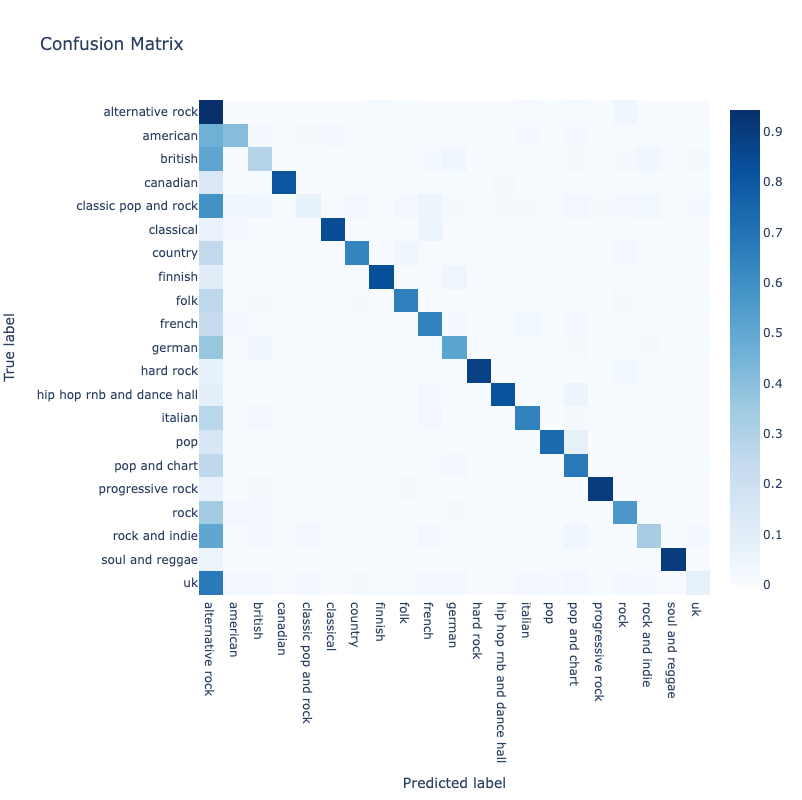

In [55]:
plot_confusion_matrix(y_test.argmax(1), y_pred_lstm.argmax(1), classes=tag_mbz_filtered, normalize=True)

## Loading the third model: Bidirectional LSTMs with Batch Normalization

In [61]:
loaded_model_birnn = load_model('../models/model_birnn.h5')

### Calculating the evaluation metrics for the second model

In [62]:
y_pred_probs_birnn = loaded_model_birnn.predict(x_test_reshaped)
y_pred_birnn = (y_pred_probs_birnn > 0.5).astype(int)

accuracy_birnn = accuracy_score(y_test, y_pred_birnn)
print("Test Accuracy:", accuracy_birnn)

precision_birnn, recall_birnn, f1_score_birnn, _ = precision_recall_fscore_support(y_test, y_pred_birnn, average='micro')
auc_roc_birnn = roc_auc_score(y_test, y_pred_probs_birnn, average='micro')
print(f'Test Precision: {precision_birnn}, Test Recall: {recall_birnn}, Test F1-score: {f1_score_birnn}, Test AUC-ROC: {auc_roc_birnn}')

2024-03-16 15:46:20.131738: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-16 15:46:20.263469: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-16 15:46:20.273959: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


  4/275 [..............................] - ETA: 4s  

2024-03-16 15:46:20.353794: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-16 15:46:20.363267: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-16 15:46:20.430715: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - 4s 11ms/step
Test Accuracy: 0.8692684036864262
Test Precision: 0.8806916426512968, Test Recall: 0.8692684036864262, Test F1-score: 0.874942739349519, Test AUC-ROC: 0.9815267932907942


### Plotting the confusion matrix for the third model

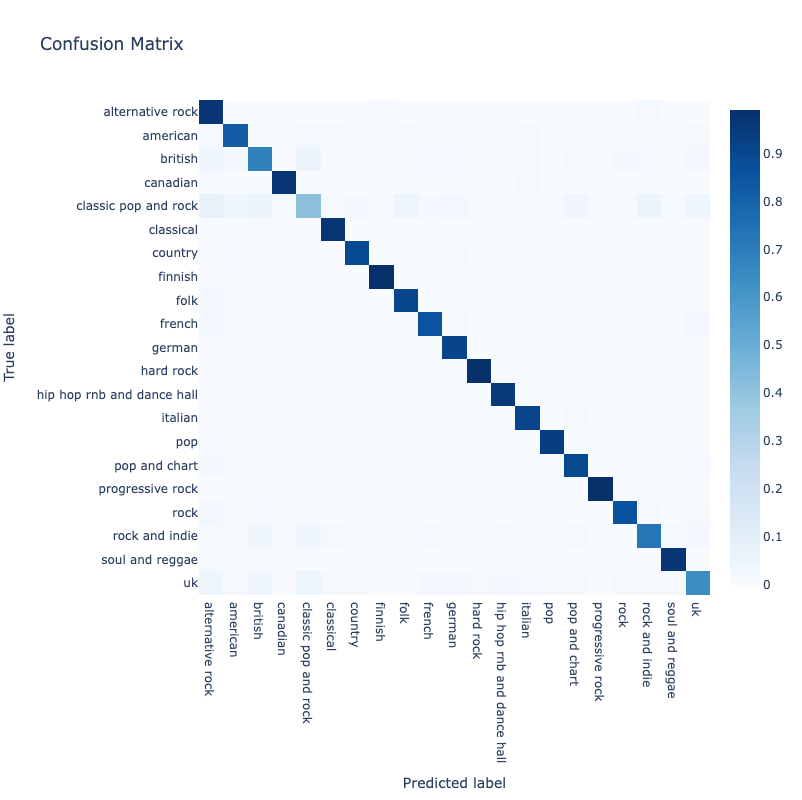

In [63]:
plot_confusion_matrix(y_test.argmax(1), y_pred_birnn.argmax(1), classes=tag_mbz_filtered, normalize=True)